# Initialization


The original implementation of Dynamic Programming belongs to Plinio Vargas.

https://github.com/phvargas/TSP-python

In [0]:
from timeit import default_timer as timer
from math import sqrt
from random import random
from google.colab import files
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Download the "Coors_140.csv" from the GitHub repository and upload it
uploaded = files.upload()

In [0]:
coors = pd.read_csv("Coors_140.csv") 
coords = coors.to_numpy()
coords = np.delete(coords, 0,1)
amount_of_coordinates = 15  # maximum 19
Coordinates = coords[:amount_of_coordinates]

#Plotting
plt.scatter(Coordinates[0][1], Coordinates[0][2], c='r', marker='D')
plt.scatter(Coordinates[1:,1], Coordinates[1:,2])

In [0]:
# If you prefer to generate the coordinates randomly, follow this step.

nodes = 12   # maximum 19
Coordinates = np.ones((nodes, 3))
Coordinates[0] = 1, 0.5, 0.5

for i in range(1, nodes):
  Coordinates[i] = int(i+1), random(), random()

#Plotting
plt.scatter(Coordinates[0][1], Coordinates[0][2], c='r', marker='D')
plt.scatter(Coordinates[1:,1], Coordinates[1:,2])

# Distance Matrix

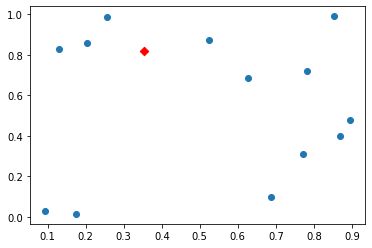

In [13]:
def Distance(x1, y1, x2, y2):
    return sqrt((x1-x2)**2+(y1-y2)**2)

#Creating Distance Matrix
length = len(Coordinates)
Distance_Matrix = np.zeros((length, length))
for i in range(length):
  for j in range(length):
    Distance_Matrix[i][j] = Distance(Coordinates[i][1],  Coordinates[i][2], Coordinates[j][1], Coordinates[j][2])  

# Cost of tour


In [0]:
def FindCurrentCost(CurTour):
    CurTour.insert(0,1)
    CurTour.append(1)
    temporaryDis=0
    for i in range(len(CurTour)-1):    
       temporaryDis += Distance_Matrix[CurTour[i]-1,CurTour[i+1]-1]
    return temporaryDis 

# Plotting

In [0]:
def Plotting(tour, coords):
    n=len(tour)
    longitude=[]
    latitude=[]
    
    for i in range(n):
            longitude.append(coords[tour[i]-1, 1])
            latitude.append(coords[tour[i]-1, 2])
    plt.figure()    
    plt.plot([longitude[i] for i in range(n)],
              [latitude[i] for i in range(n)],'-.', color='cornflowerblue')
    plt.scatter(Coordinates[0][1], Coordinates[0][2], c = 'r', marker='D')
    plt.scatter(Coordinates[1:,1], Coordinates[1:,2])

# Dynamic Programming


Shortest Tour: [1, 1, 12, 8, 2, 14, 4, 10, 11, 7, 5, 3, 13, 9, 6, 1, 1]
Shortest Tour cost: 3.557
Calculation Time: 2.4557 sec


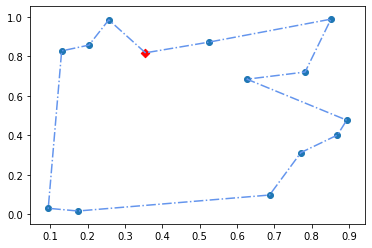

In [14]:
n = len(Coordinates)
Savings = {}
p = []

start = timer()

def get_minimum(k, a):

    if (k, a) in Savings:
        return Savings[k, a]

    values = []
    all_min = []
    for j in a:
        set_a = deepcopy(list(a))
        set_a.remove(j)
        all_min.append([j, tuple(set_a)])
        result = get_minimum(j, tuple(set_a))
        values.append(Distance_Matrix[k-1][j-1] + result)

    Savings[k, a] = min(values)
    p.append(((k, a), all_min[values.index(Savings[k, a])]))

    return Savings[k, a]

for x in range(1, n):
  Savings[x + 1, ()] = Distance_Matrix[x][0]

get_minimum(1, tuple(range(2,len(Distance_Matrix)+1)))


#Shortest tour 
solution = p.pop()
Shortest_Tour = [1]
Shortest_Tour.append(solution[1][0])

for x in range(n - 2):
  for new_solution in p:
    if tuple(solution[1]) == new_solution[0]:
      solution = new_solution
      Shortest_Tour.append(solution[1][0])
      break

Shortest_Tour.append(1)
Shortest_Tour_Cost = FindCurrentCost(Shortest_Tour)
end = timer()

print("Shortest Tour:",Shortest_Tour)
print("Shortest Tour cost:","{0:.3f}".format(round(Shortest_Tour_Cost,3)))
print("Calculation Time:","{0:.4f}".format(round((end - start),4)), "sec")
Plotting(Shortest_Tour, Coordinates)